In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
df = pd.read_csv("../data/burger-king-menu.csv")
print(df.info(),'\n\n\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item               77 non-null     object 
 1   Category           77 non-null     object 
 2   Calories           77 non-null     float64
 3   Fat Calories       77 non-null     float64
 4   Fat (g)            77 non-null     float64
 5   Saturated Fat (g)  77 non-null     float64
 6   Trans Fat (g)      77 non-null     float64
 7   Cholesterol (mg)   77 non-null     float64
 8   Sodium (mg)        77 non-null     float64
 9   Total Carb (g)     77 non-null     float64
 10  Dietary Fiber (g)  77 non-null     float64
 11  Sugars (g)         77 non-null     float64
 12  Protein (g)        77 non-null     float64
 13  Weight Watchers    77 non-null     float64
dtypes: float64(12), object(2)
memory usage: 8.6+ KB
None 





,Item,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers
0,Whopper® Sandwich,Burgers,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49.0,2.0,11.0,28.0,655.0
1,Whopper® Sandwich with Cheese,Burgers,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50.0,2.0,11.0,32.0,735.0
2,Bacon & Cheese Whopper® Sandwich,Burgers,790.0,460.0,51.0,17.0,2.0,125.0,1560.0,50.0,2.0,11.0,35.0,783.0
3,Double Whopper® Sandwich,Burgers,900.0,520.0,58.0,20.0,3.0,175.0,1050.0,49.0,2.0,11.0,48.0,883.0
4,Double Whopper® Sandwich with Cheese,Burgers,980.0,580.0,64.0,24.0,3.0,195.0,1410.0,50.0,2.0,11.0,52.0,963.0


In [2]:
df['Category'] = df['Category'].astype('category')
numeric_codes = df['Category'].cat.codes
df['Category_Code'] = numeric_codes

df.head()

,Item,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers,Category_Code
0,Whopper® Sandwich,Burgers,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49.0,2.0,11.0,28.0,655.0,1
1,Whopper® Sandwich with Cheese,Burgers,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50.0,2.0,11.0,32.0,735.0,1
2,Bacon & Cheese Whopper® Sandwich,Burgers,790.0,460.0,51.0,17.0,2.0,125.0,1560.0,50.0,2.0,11.0,35.0,783.0,1
3,Double Whopper® Sandwich,Burgers,900.0,520.0,58.0,20.0,3.0,175.0,1050.0,49.0,2.0,11.0,48.0,883.0,1
4,Double Whopper® Sandwich with Cheese,Burgers,980.0,580.0,64.0,24.0,3.0,195.0,1410.0,50.0,2.0,11.0,52.0,963.0,1


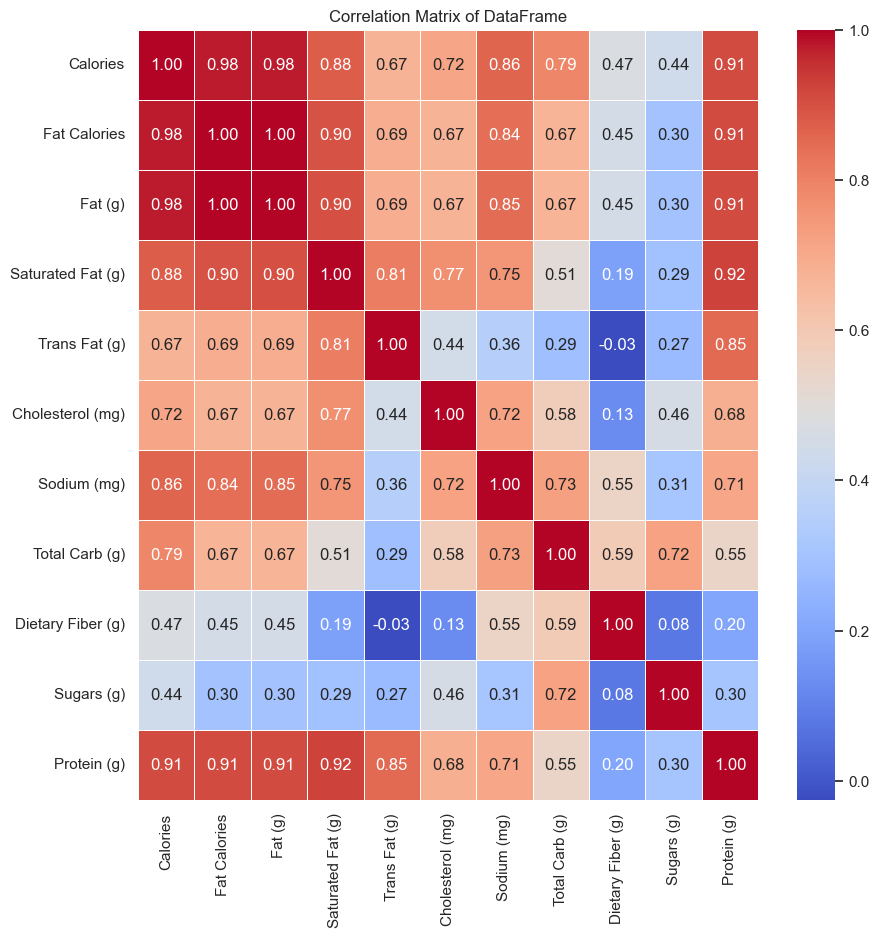

In [3]:
numerical_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
numerical_columns.remove('Weight Watchers')
corr = df[numerical_columns].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of DataFrame')
plt.show()

In [19]:
co = corr.unstack().sort_values(ascending=False).reset_index() # type: ignore
co.columns = ['column_1', 'column_2', 'correlation']
stronly_correlated = co[(co['column_1'] != co['column_2']) & (co['correlation'] != 1.0) & (co['correlation'] >= 0.75)].reset_index(drop=True)
stronly_correlated['correlation'].drop_duplicates(inplace=True)
final_correlations = stronly_correlated[::2].reset_index(drop=True)
final_correlations

,column_1,column_2,correlation
0,Fat Calories,Fat (g),0.999726
1,Fat (g),Calories,0.979509
2,Fat Calories,Calories,0.979337
3,Protein (g),Saturated Fat (g),0.924010
4,Protein (g),Calories,0.911343
5,Fat Calories,Protein (g),0.910305
6,Fat (g),Protein (g),0.909542
7,Fat (g),Saturated Fat (g),0.900937
8,Fat Calories,Saturated Fat (g),0.899786
9,Calories,Saturated Fat (g),0.879709


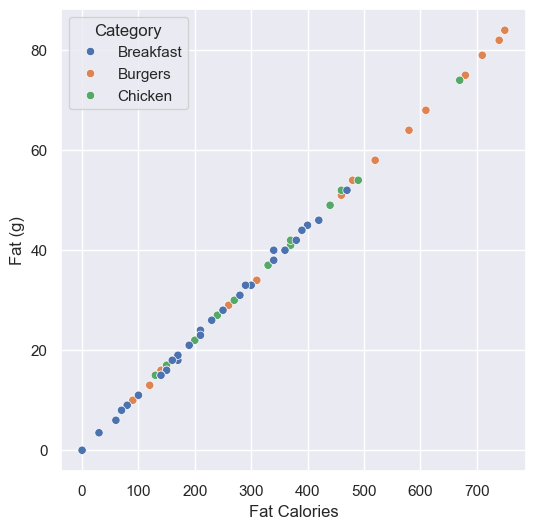

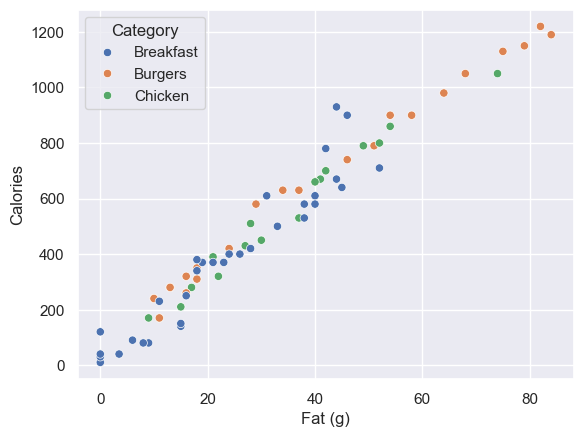

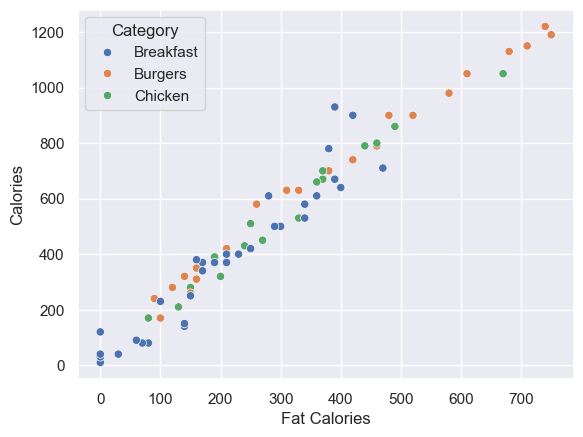

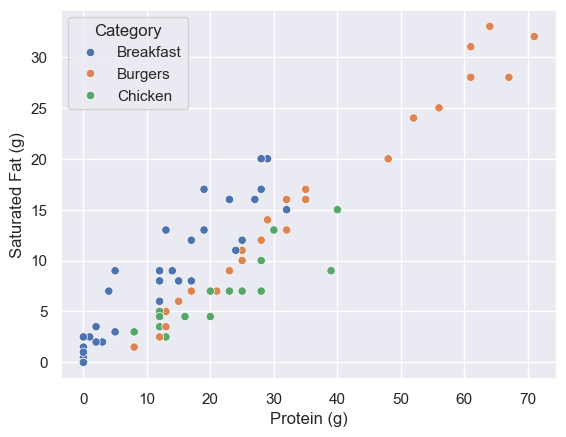

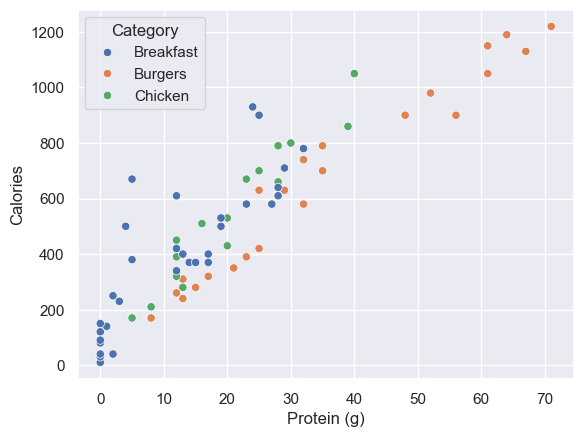

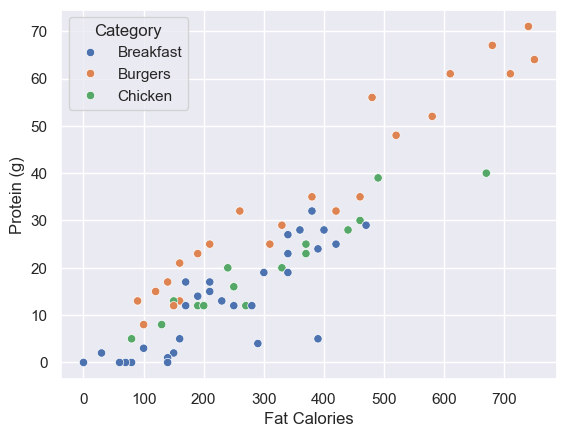

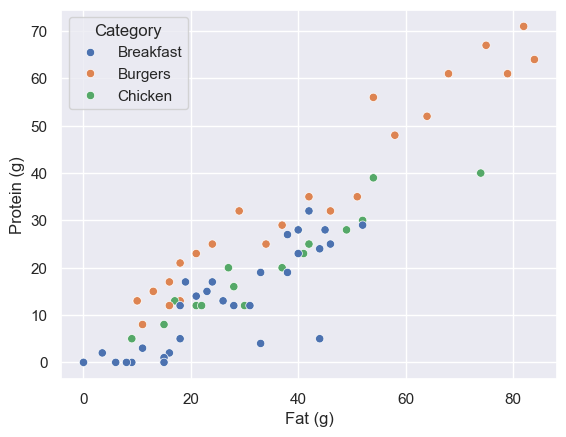

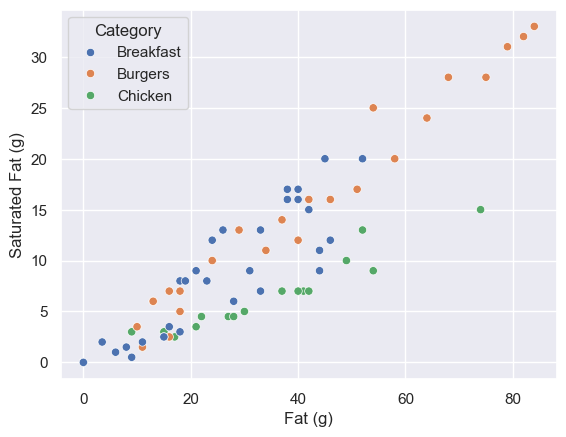

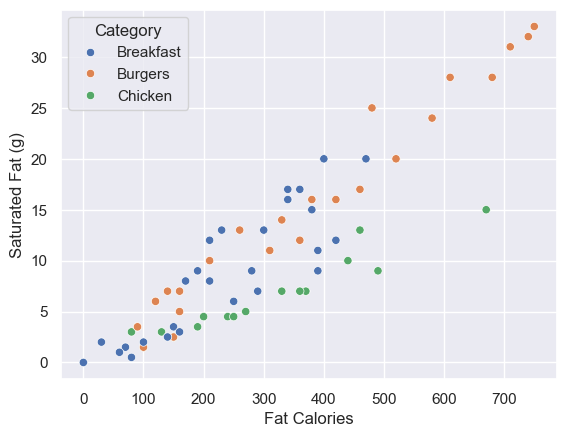

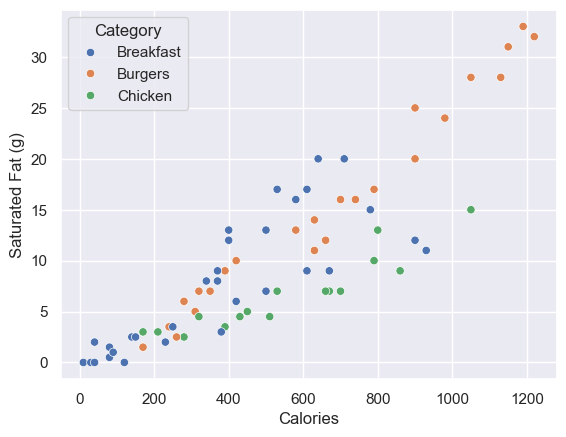

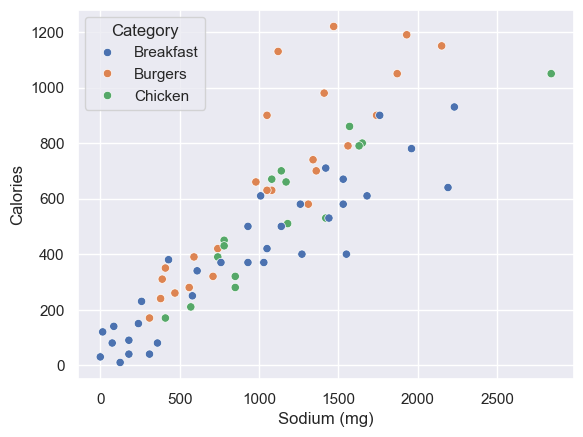

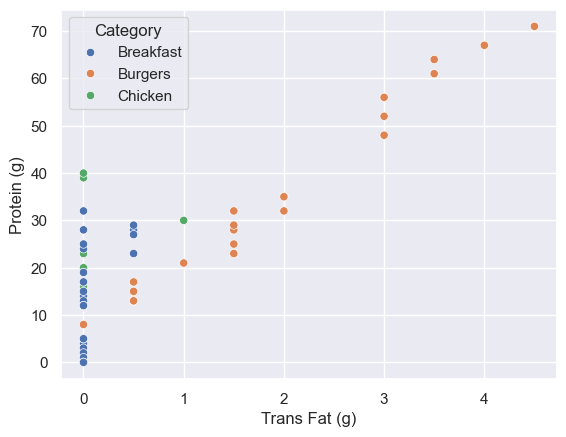

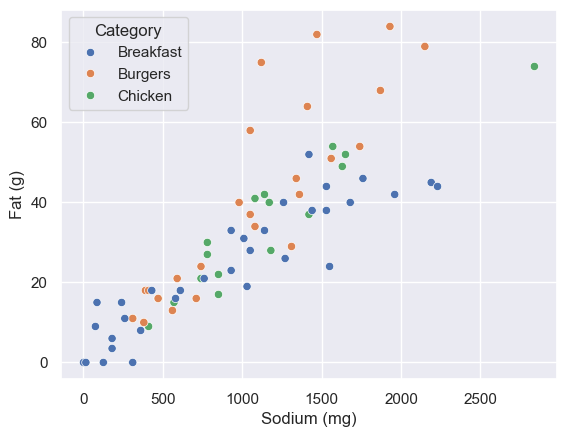

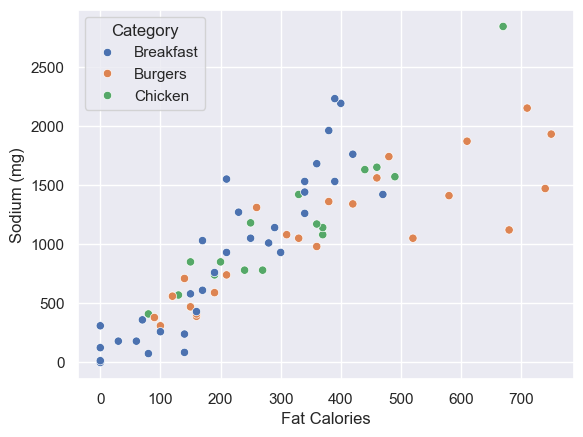

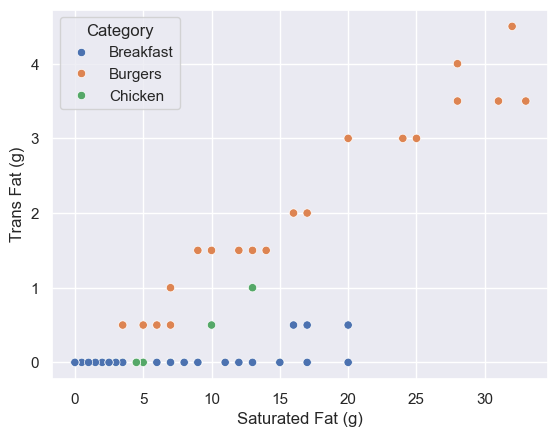

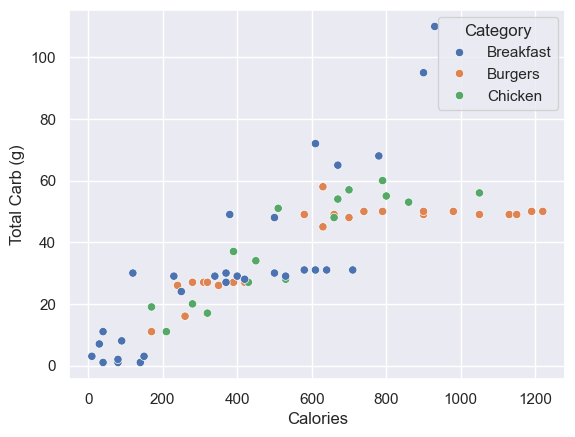

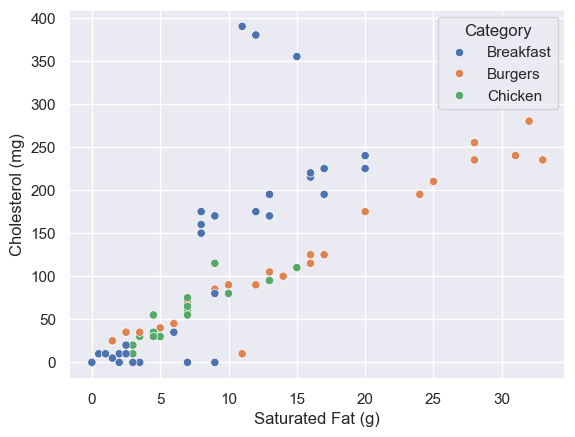

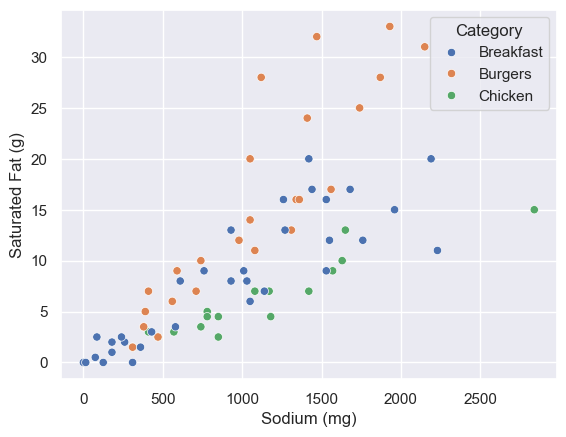

In [23]:
plt.figure(figsize=(6,6))

for index, row in final_correlations.iterrows():
    name_1 = row['column_1']
    name_2 = row['column_2']
    
    sns.scatterplot(data=df, x=name_1, y=name_2, hue='Category')
    plt.show()